In [40]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [41]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

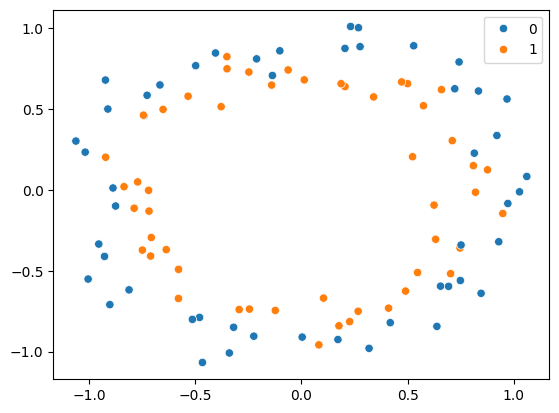

In [42]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

Early Stopping

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [62]:
model = Sequential()

model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50,  activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [67]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1,callbacks=callback)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6352 - loss: 0.6588 - val_accuracy: 0.5000 - val_loss: 0.7148
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6352 - loss: 0.6633 - val_accuracy: 0.5000 - val_loss: 0.7133
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6180 - loss: 0.6563 - val_accuracy: 0.5000 - val_loss: 0.7101
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6953 - loss: 0.6563 - val_accuracy: 0.5000 - val_loss: 0.7088
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6656 - loss: 0.6502 - val_accuracy: 0.5000 - val_loss: 0.7070
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7094 - loss: 0.6432 - val_accuracy: 0.5000 - val_loss: 0.7069
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7016 - loss: 0.6397 - val_accuracy: 0.6000 - val_loss: 0.7033
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7172 - loss: 0.6375 - val_accuracy: 0.5500 - val_loss:

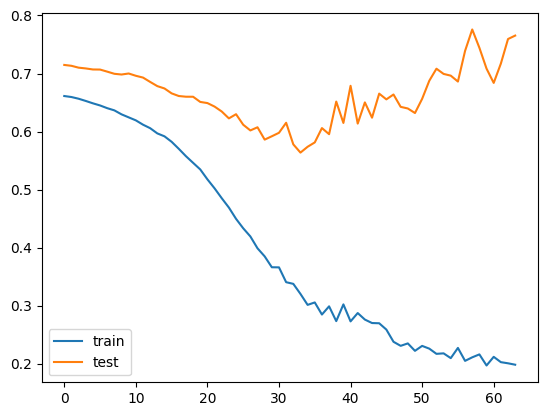

In [68]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 708us/step


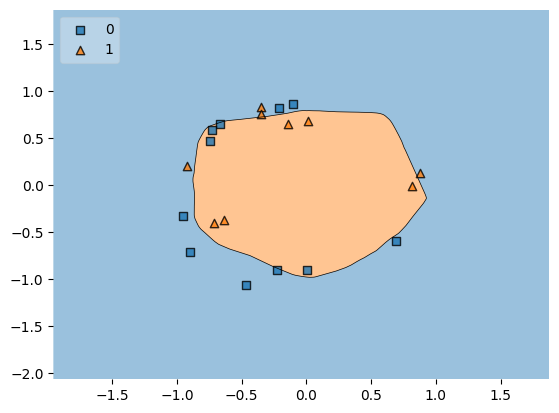

In [69]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()